In [1]:
import cv2
import math

count = 0
videoFile = "../video/Tom and Jerry.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)

x=1

while (cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename = "./picture/frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)

cap.release()
print("Done!")

Done!


In [2]:
#Tom and Jerry3.mp4 이미지 추출

count = 0
videoFile = "../video/Tom and Jerry 3.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5)

x=1

while (cap.isOpened()):
    frameId = cap.get(1)
    ret, frame = cap.read()
    
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename = "./picture/test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)

cap.release()
print("Done!")

Done!


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.utils import np_utils
from skimage.transform import resize

%matplotlib inline

data = pd.read_csv('../dataset/mapping.csv')
test = pd.read_csv('../dataset/testing.csv')


Using TensorFlow backend.


In [4]:
X = []
for img_name in data.Image_ID:
    img = plt.imread('./picture/' + img_name)
    X.append(img)
    
X = np.array(X)

test_image = []
for img_name in test.Image_ID:
    img = plt.imread('./picture/' + img_name)
    test_image.append(img)    
test_img = np.array(test_image)

In [5]:
from keras.utils import np_utils

train_y = np_utils.to_categorical(data.Class)
test_y = np_utils.to_categorical(test.Class)

In [6]:
image = []
for i in range(0, X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224, 224, 3)).astype(int)
    image.append(a)  
X = np.array(image)

test_image = []
for i in range(0, test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224, 224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [7]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X)
test_image = preprocess_input(test_image)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, train_y, test_size=0.3, random_state=42)

In [9]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [10]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
test_image = base_model.predict(test_image)

In [11]:
X_train = X_train.reshape(208, 7*7*512)
X_valid = X_valid.reshape(90, 7*7*512)
test_image = test_image.reshape(186, 7*7*512)

train = X_train/X_train.max()
X_valid = X_valid/X_train.max()
test_image = test_image/test_image.max()

In [12]:
model = Sequential()
model.add(InputLayer((7*7*512,))) #input layer
model.add(Dense(units=1024, activation='sigmoid')) #hidden layer
model.add(Dropout(0.5)) #adding dropout
model.add(Dense(units=512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list=[checkpoint]

history = model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks_list)

Train on 208 samples, validate on 90 samples
Epoch 1/100
208/208 [==============================] - 4s 21ms/step - loss: 1.3881 - accuracy: 0.3462 - val_loss: 1.1311 - val_accuracy: 0.4111

Epoch 00001: val_loss improved from inf to 1.13106, saving model to weights.best.hdf5
Epoch 2/100
208/208 [==============================] - 4s 20ms/step - loss: 1.2697 - accuracy: 0.3029 - val_loss: 1.0501 - val_accuracy: 0.3889

Epoch 00002: val_loss improved from 1.13106 to 1.05008, saving model to weights.best.hdf5
Epoch 3/100
208/208 [==============================] - 4s 19ms/step - loss: 1.1300 - accuracy: 0.4231 - val_loss: 1.0397 - val_accuracy: 0.6333

Epoch 00003: val_loss improved from 1.05008 to 1.03966, saving model to weights.best.hdf5
Epoch 4/100
208/208 [==============================] - 4s 18ms/step - loss: 1.0642 - accuracy: 0.4375 - val_loss: 0.9699 - val_accuracy: 0.6222

Epoch 00004: val_loss improved from 1.03966 to 0.96986, saving model to weights.best.hdf5
Epoch 5/100
208/208

208/208 [==============================] - 4s 19ms/step - loss: 0.0119 - accuracy: 0.9952 - val_loss: 0.2722 - val_accuracy: 0.9222

Epoch 00040: val_loss did not improve from 0.21868
Epoch 41/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0228 - accuracy: 0.9856 - val_loss: 0.2720 - val_accuracy: 0.9222

Epoch 00041: val_loss did not improve from 0.21868
Epoch 42/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0221 - accuracy: 0.9904 - val_loss: 0.2554 - val_accuracy: 0.9222

Epoch 00042: val_loss did not improve from 0.21868
Epoch 43/100
208/208 [==============================] - 4s 20ms/step - loss: 0.0199 - accuracy: 0.9952 - val_loss: 0.2869 - val_accuracy: 0.9000

Epoch 00043: val_loss did not improve from 0.21868
Epoch 44/100
208/208 [==============================] - 4s 20ms/step - loss: 0.0106 - accuracy: 0.9904 - val_loss: 0.3822 - val_accuracy: 0.8556

Epoch 00044: val_loss did not improve from 0.21868
Epoch 45/100
208/208 [======


Epoch 00081: val_loss did not improve from 0.21868
Epoch 82/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0085 - accuracy: 0.9952 - val_loss: 0.2848 - val_accuracy: 0.9111

Epoch 00082: val_loss did not improve from 0.21868
Epoch 83/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0127 - accuracy: 0.9904 - val_loss: 0.2732 - val_accuracy: 0.9333

Epoch 00083: val_loss did not improve from 0.21868
Epoch 84/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0081 - accuracy: 0.9952 - val_loss: 0.2854 - val_accuracy: 0.9222

Epoch 00084: val_loss did not improve from 0.21868
Epoch 85/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0093 - accuracy: 0.9952 - val_loss: 0.2896 - val_accuracy: 0.9333

Epoch 00085: val_loss did not improve from 0.21868
Epoch 86/100
208/208 [==============================] - 4s 19ms/step - loss: 0.0086 - accuracy: 0.9952 - val_loss: 0.2910 - val_accuracy: 0.9222

Epoch 00086: v

In [14]:
scores = model.evaluate(test_image, test_y)

print("Real Test %s: %2.2f%%" % (model.metrics_names[1], scores[1]*100))

186/186 [==============================] - 0s 2ms/step
Real Test accuracy: 58.06%


In [51]:
#predictions = np.argmax(model.predict(test_image), axis=-1)
predictions = model.predict_classes(test_image)
#predictions = np.argmax(model.predict(test_image), axis=-1)


for i in range(10):
    x = np.argmax(test_y[i])
    
    print('actual: ' + str(x) + '    prediction: ' + str(predictions[i]))

print("The screen time of None is", predictions[predictions==0].shape[0], "seconds")
print("The screen time of Jerry is", predictions[predictions==1].shape[0], "seconds")
print("The screen time of Tom is", predictions[predictions==2].shape[0], "seconds")

actual: 2    prediction: 2
actual: 2    prediction: 2
actual: 0    prediction: 0
actual: 1    prediction: 0
actual: 2    prediction: 2
actual: 0    prediction: 0
actual: 0    prediction: 0
actual: 0    prediction: 0
actual: 2    prediction: 0
actual: 2    prediction: 0
The screen time of None is 95 seconds
The screen time of Jerry is 0 seconds
The screen time of Tom is 91 seconds


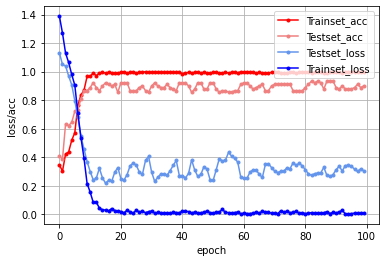

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()